<a href="https://colab.research.google.com/github/AugustvonMackensen/AI_colab/blob/main/deeplearning_1_perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] Load needed packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

[2] Define Prepare_Data Function

In [2]:
def prepare_data(target):
  iris = load_iris() # Read Iris dataset
  X_tr = iris.data[:, 2:] # Pick the length and width for the bloom
  labels = iris.target_names # 'setosa', 'versicolor', 'virginica'
  y = iris.target

  # Label the samples - If targeted, then 1 else 0
  y_tr = []
  for i in range(150):
    y_tr.append(labels[y[i]] == target)
  y_tr = np.array(y_tr, dtype=int)
  return X_tr, y_tr, ['(1) ' + target, '(0) the others']

[3] Activation : Step

In [3]:
def step(x):
  return int(x >= 0)

[4] Define Perception Class

In [4]:
class Perceptron():
  def __init__(self, dim, activation):
    rnd = np.random.default_rng()
    self.dim = dim
    self.activation = activation

    # initialize weight and bias by He Normal Method
    self.w = rnd.normal(scale=np.sqrt(2.0/dim), size = dim)
    self.b = rnd.normal(scale=np.sqrt(2.0/dim))

  def printW(self):
    for i in range(self.dim):
      print(' w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
    print(' b={:6.3f}'.format(self.b))

  def predict(self, x): # calculate the sample that is stored in numpy array x
    return np.array([self.activation(np.dot(self.w, x[i]) + self.b) for i in range(len(x))])

  def fit(self, X, y, N, epochs, eta=0.01):
    # Swap the index of samples randomly
    idx = list(range(N))
    np.random.shuffle(idx)
    X = np.array([X[idx[i]] for i in range(N)])
    y = np.array([y[idx[i]] for i in range(N)])

    f = 'Epochs = {:4d} Loss = {:8.5f}'
    print('Inital value of w : ', end='')
    self.printW()
    for j in range(epochs):
      for i in range(N):
        # Calculate error for the output in terms of x[i]
        delta = self.predict([X[i]])[0] - y[i]
        self.w -= eta * delta * X[i]
        self.b -= eta * delta
      # print learning process
      if j < 10 or (j+1) % 100 == 0:
        loss = self.predict(X) - y
        loss = (loss * loss).sum() / N
        print(f.format(j+1, loss), end='')
        self.printW()

[5] Visualize the model

In [5]:
def visualize(net, X, y, multi_class, labels, class_id, colors,
             xlabel, ylabel, legend_loc='lower right'):
  # list the range between min and max, the gap is 0.05
  x_max = np.ceil(np.max(X[:, 0])).astype(int)
  x_min = np.floor(np.min(X[:, 0])).astype(int)
  y_max = np.ceil(np.max(X[:, 1])).astype(int)
  y_min = np.floor(np.min(X[:, 1])).astype(int)
  x_lin = np.linspace(x_min, x_max, (x_max-x_min)*20+1)
  y_lin = np.linspace(y_min, y_max, (y_max-y_min)*20+1)

  # find x and y from the x_lin and y_Lin
  x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)

  # input
  X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])

  # calculate output in terms of X_test
  if multi_class:
    y_hat = net.predict(X_test)
    y_hat = np.array([np.argmax(y_hat[k]) for k in range(len(y_hat))], dtype=int)
  else:
    y_hat = (net.predict(X_test) >= 0.5).astype(int)
    y_hat = y_hat.reshape(len(y_hat))

  # Set the legend and color for each classes and horizontial and vertical range
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

  # draw the Scatter Plot
  for c, i, c_name in zip(colors, labels, class_id):
    # Scatter Plot for grid coodrinate
    plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                c=c, s=5, alpha=0.3, edgecolors='none')
    # Scatter Plot for learning samples
    plt.scatter(X[y==i, 0], X[y==i, 1],
                c=c, s=20, label=c_name)

  # set the position for legend
  plt.legend(loc=legend_loc)
  # print graph after setting label for x-axis and y-axis
  plt.xlabel(xlabel, size=12)
  plt.ylabel(ylabel, size=12)
  plt.show()

[6] Prepare for training data

In [6]:
nSamples = 150
nDim = 2
target = 'setosa' # set the bloom
X_tr, y_tr, labels = prepare_data(target)

[7] Generate Perceptron Class and Learning

In [7]:
p = Perceptron(nDim, activation=step)
p.fit(X_tr, y_tr, nSamples, epochs=1000, eta=0.01)

Inital value of w :  w1 =  0.038 w2 =  1.186 b=-0.358
Epochs =    1 Loss =  0.40000 w1 = -0.348 w2 =  0.883 b=-0.068
Epochs =    2 Loss =  0.29333 w1 = -0.362 w2 =  0.707 b= 0.272
Epochs =    3 Loss =  0.06000 w1 = -0.347 w2 =  0.608 b= 0.442
Epochs =    4 Loss =  0.02667 w1 = -0.375 w2 =  0.554 b= 0.492
Epochs =    5 Loss =  0.01333 w1 = -0.359 w2 =  0.539 b= 0.522
Epochs =    6 Loss =  0.01333 w1 = -0.359 w2 =  0.522 b= 0.542
Epochs =    7 Loss =  0.00667 w1 = -0.370 w2 =  0.513 b= 0.542
Epochs =    8 Loss =  0.01333 w1 = -0.364 w2 =  0.506 b= 0.552
Epochs =    9 Loss =  0.00667 w1 = -0.375 w2 =  0.497 b= 0.552
Epochs =   10 Loss =  0.00667 w1 = -0.369 w2 =  0.490 b= 0.562
Epochs =  100 Loss =  0.00000 w1 = -0.364 w2 =  0.428 b= 0.612
Epochs =  200 Loss =  0.00000 w1 = -0.364 w2 =  0.428 b= 0.612
Epochs =  300 Loss =  0.00000 w1 = -0.364 w2 =  0.428 b= 0.612
Epochs =  400 Loss =  0.00000 w1 = -0.364 w2 =  0.428 b= 0.612
Epochs =  500 Loss =  0.00000 w1 = -0.364 w2 =  0.428 b= 0.612
E

[8] Visualize

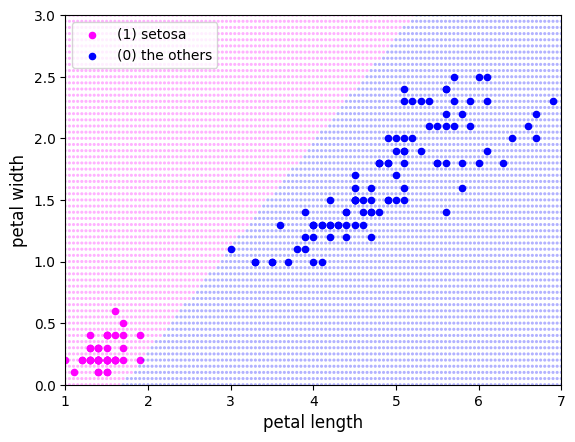

In [8]:
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')

Case : Classify 'virginica'

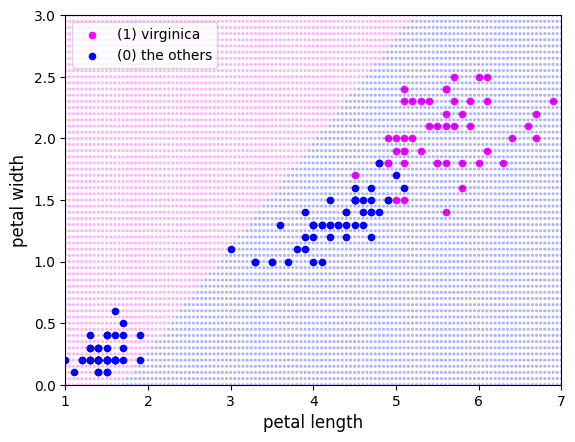

In [9]:
nSamples = 150
nDim = 2
target = 'virginica' # set the bloom
X_tr, y_tr, labels = prepare_data(target)
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')

Case : Classify 'versicolor'

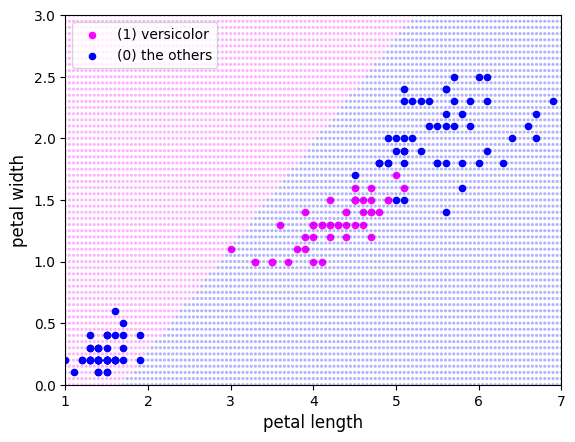

In [10]:
nSamples = 150
nDim = 2
target = 'versicolor' # set the bloom
X_tr, y_tr, labels = prepare_data(target)
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')